Importing necessary modules

In [189]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

Function for R2

In [190]:
def r2(y_true, y_pred):
    mean = np.mean(y_true)
    d = 0 
    for i in y_true:
        d += (mean-i)**2
    n = 0
    for i in range(len(y_true)):
        n += (y_true[i] - y_pred[i])**2
    return 1 - n/d

Decision Tree from Scratch

In [191]:
class decisionTreeRegressor:
    def __init__(self, maxDepth, minSamples= 5):
        self.maxDepth = maxDepth
        self.treeNode = {}
        self.minSamples = minSamples
        
    def residual(self,mean,arr):
        sum = 0
        for i in arr:
            sum += (mean - i)**2
        return sum
    
    def bestSplit(self,xi_,y):
        split = float("inf")
        resi = float("inf")
        xi = np.sort(xi_)
        avgxi = np.array([(xi[i]+xi[i+1])/2 for i in range(len(xi)-1)])
        dicAvg = {}
        for i in avgxi:
         if i not in dicAvg:
            dicAvg[i] = 1
            yRight = y[xi >= i].copy()
            yLeft = y[xi < i].copy()
            if len(yRight) !=0:
                meanRight = np.mean(yRight)
            else:
                meanRight = 0
            if len(yLeft) !=0:
                meanLeft = np.mean(yLeft)
            else:
                meanLeft = 0
            tempResi = self.residual(meanRight,yRight) + self.residual(meanLeft,yLeft)
            if tempResi < resi:
                resi = tempResi
                split = i
        return resi,split
    
    def returnAnswer(self,y):
       if len(y)!=0:
        sd = np.var(y)**0.5
        avg = np.mean(y)
        c = np.random.normal(loc = 0, scale = 0.05, size = 1)[0]
        return avg
       return 0
    
    def fit(self,x,y,index = 0,length = 0):
        if index == 0:
            self.treeNode = {}
        if length >= self.maxDepth:
            self.treeNode[index] = 'Value:'+str(self.returnAnswer(y))
            return
        if len(y) <= self.minSamples:
            self.treeNode[index] = 'Value:'+str(self.returnAnswer(y))
            return
        
        split = -1
        error = float("inf")
        valSplit = float("inf")
        
        for i in range(x.shape[1]):
            temp = self.bestSplit(x[:,i].copy(),y.copy())
            if temp[0] < error:
                error = temp[0]
                valSplit = temp[1]
                split = i

        length+=1
        tree.treeNode[index] = [split,valSplit]
        
        
        xLeft = x[x[:,split] < valSplit].copy()
        xRight = x[x[:,split] >= valSplit].copy()
        yLeft = y[x[:,split] < valSplit].copy()
        yRight = y[x[:,split] >= valSplit].copy()
        
        lengthCopy = length
        
        self.fit(xLeft,yLeft,2*index +1, lengthCopy)
        self.fit(xRight,yRight,2*index+2, lengthCopy)
    
    def predictOne(self,xi):
        i = 0
        while type(self.treeNode[i]) != str:
            if xi[self.treeNode[i][0]] >= self.treeNode[i][1]:
                i = 2*i + 2
            else:
                i = 2*i + 1
        return float(self.treeNode[i].split(':')[1])
    
    def predict(self,x):
        y = []
        for xi in x:
            y.append(self.predictOne(xi))
        return np.array(y)

In [192]:
tree = decisionTreeRegressor(7,10)

In [193]:
df = pd.read_csv('/content/Housing.csv')

Preprocessing

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [195]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [196]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [197]:
for i in df.columns:
    print(i,df[i].nunique())

price 219
area 284
bedrooms 6
bathrooms 4
stories 4
mainroad 2
guestroom 2
basement 2
hotwaterheating 2
airconditioning 2
parking 4
prefarea 2
furnishingstatus 3


In [198]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [199]:
for col in df.columns[5:10]:
    df.loc[df[col]=='yes',col] = 1
    df.loc[df[col]=='no',col] = 0

In [200]:
df.loc[df['prefarea']=='yes','prefarea'] = 1
df.loc[df['prefarea']=='no','prefarea'] = 0

In [201]:
df = pd.get_dummies( data = df, columns=['furnishingstatus'], prefix_sep='', prefix = '')

In [202]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


Removing Outliers

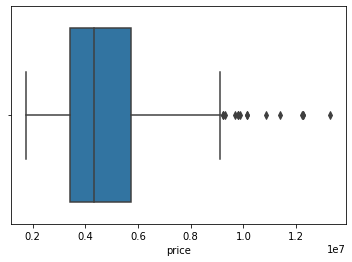

In [203]:
sns.boxplot(x = 'price', data = df)

In [204]:
rows2Delete = np.where(df['price'] > 0.86e7)

In [205]:
for i in rows2Delete:
    df.drop(i, inplace = True)
df.reset_index(inplace = True, drop = True)

In [206]:
rows2Delete

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),)

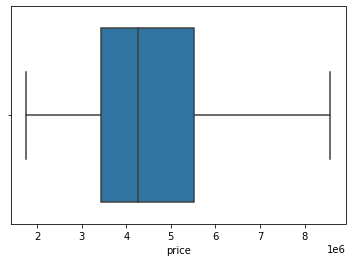

In [207]:
sns.boxplot(x = 'price', data = df)

In [208]:
y = np.array(df['price'])
X = np.array(df.iloc[:,1:])

In [209]:
from sklearn.model_selection import train_test_split as tts

In [210]:
X_train, X_test , y_train, y_test = tts(X,y,test_size=0.3, random_state=12)

In [211]:
tree.fit(X_train,y_train)

In [212]:
y_pred = tree.predict(X_test)

In [213]:
r2(y_test, y_pred)

0.3543455558037949

Code for Kfold

In [214]:
def kFold(x,y,model,k=5):
    xlist = []
    ylist = []
    part = int(len(x)/k)
    for i in range(k):
        tempx = [x[j] for j in range(part*i ,part*i + part)]
        tempy = [y[j] for j in range(part*i, part*i + part)]
        xlist.append(tempx)
        ylist.append(tempy)
    res = []
    for i in range(k):
        xtrain = []
        ytrain = []
        xtest = []
        ytest = []
        for j in range(k):
            if i!=j:
                xtrain.extend(xlist[j])
                ytrain.extend(ylist[j])
            else:
                xtest.extend(xlist[j])
                ytest.extend(ylist[j])
        model.fit(np.array(xtrain),np.array(ytrain))
        ypred = model.predict(np.array(xtest))
        res.append(r2(ytest, ypred))
    return res , np.mean(np.array(res))

In [215]:
kFold(X_train,y_train,tree)

([0.2407671447135573,
  0.39268371948525527,
  0.24628675257721222,
  0.4173293012454107,
  0.18222079879483433],
 0.2958575433632539)

Finding Maxdepth

In [216]:
maxDepth = [7,8,9,10,11,12]
dictionaryErrors = []
depths = []
for i in maxDepth:
    tree = decisionTreeRegressor(i,10)
    _ , error = kFold(X_train, y_train , tree)
    dictionaryErrors.extend(_)
    depths.extend([i,]*len(_))

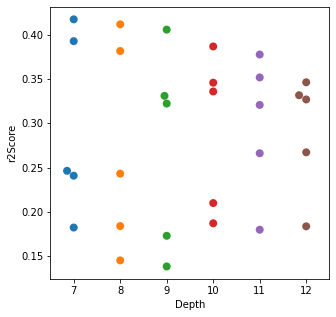

In [217]:
df_ = pd.DataFrame()
df_['Depth'] = depths
df_['r2Score'] = dictionaryErrors
figure, axis = plt.subplots(1,1,figsize = (5,5))
sns.swarmplot(ax = axis,x = 'Depth',y = 'r2Score', data = df_, size = 8)

In [218]:
maxDepth = [7,8,9,10,11,12]
dictionaryErrors = []
for i in maxDepth:
    tree = decisionTreeRegressor(i,10)
    _ , error = kFold(X_train, y_train , tree)
    dictionaryErrors.append(error)

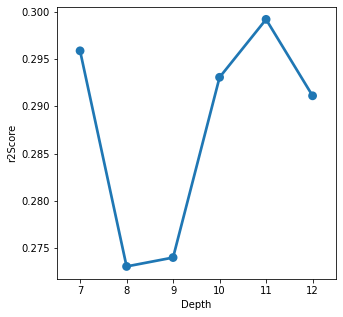

In [219]:
df_ = pd.DataFrame()
df_['Depth'] = maxDepth
df_['r2Score'] = dictionaryErrors
figure, axis = plt.subplots(1,1,figsize = (5,5))
sns.pointplot(ax = axis,x = 'Depth',y = 'r2Score', data = df_)

Codes for Bagging

In [220]:
def baggingSplit(x,y,sampleSplit):
    returnArray = []
    ix = np.random.randint(0,len(x),int(sampleSplit * len(x)))
    returnArray.append(x[ix].copy())
    returnArray.append(y[ix].copy())
    return returnArray

In [221]:
def bagging(model,xtrain, ytrain, xtest, ytest, sampleSplit = 0.8,nEstimators = 10):
    res = {}
    count = 0
    trees = {}
    yPredict = []
    while count != nEstimators:
        array = baggingSplit(xtrain,ytrain,sampleSplit)
        xTr = array[0]
        yTr = array[1]
        model.fit(xTr,yTr)
        yPr = model.predict(xtest)
        if r2(yPr,ytest) >= -0.2:
            res[count+1] = (r2(ytest,yPr))
            trees[count+1] = model.treeNode.copy()
            yPredict.append(yPr)
            count+=1
    avgY = []
    for i in range(len(ytest)):
        sum = 0
        for j in range(nEstimators):
            sum+=yPredict[j][i]
        avgY.append(sum / nEstimators)
    return np.array(avgY), res , r2(ytest, avgY), trees

In [222]:
tree = decisionTreeRegressor(11,5)

In [223]:
treesResult = bagging(tree, X_train, y_train, X_test, y_test)

In [224]:
print("r2 Score for each tree:")
for i in range(len(treesResult[1])):
    print(i+1,'==>',treesResult[1][i+1])

r2 Score for each tree:
1 ==> 0.33603177344451673
2 ==> 0.27930891357003673
3 ==> 0.3434752860715321
4 ==> 0.4380248745426307
5 ==> 0.21356214974651921
6 ==> 0.4094901423779159
7 ==> 0.48158700395139076
8 ==> 0.2656566642379481
9 ==> 0.3057521198418789
10 ==> 0.30126512887890455


In [225]:
print("r2 Score Ensemble Learning:",treesResult[2])

r2 Score Ensemble Learning: 0.5573649093466285


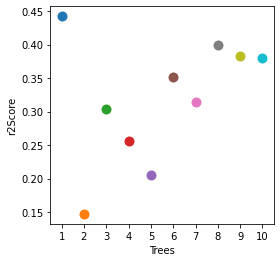

In [131]:
df_ = pd.DataFrame()
df_['Trees'] = [i+1 for i in range(10)]
df_['r2Score'] = [treesResult[1][i+1] for i in range(10)]
figure, axis = plt.subplots(1,1,figsize = (4,4))
sns.swarmplot(ax = axis,x = 'Trees',y = 'r2Score', data = df_, size = 10)

Overall Results

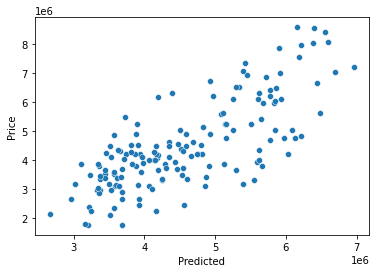

In [132]:
df_ = pd.DataFrame()
df_['Predicted'] = treesResult[0]
df_['Price'] = y_test
figure, axis = plt.subplots(1,1,figsize = (6,4))
sns.scatterplot(x = 'Predicted', y = 'Price', data = df_)

In [133]:
maxDepth = [8,9,10,11,12,13]
r2Errors = []
for depth in maxDepth:
    tree = decisionTreeRegressor(depth,10)
    r2Errors.append(bagging(tree, X_train, y_train, X_train, y_train)[2])

Maxdepth

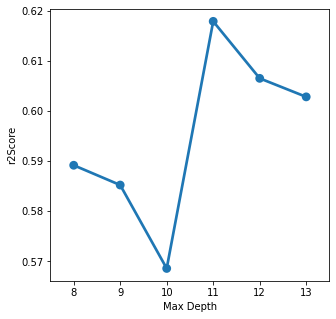

In [134]:
df_ = pd.DataFrame()
df_['r2Score'] = r2Errors
df_['Max Depth'] = maxDepth
figure, axis = plt.subplots(1,1,figsize = (5,5))
sns.pointplot(x = 'Max Depth', y = 'r2Score', data = df_)

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
rfc = RandomForestRegressor(n_estimators=10)

In [137]:
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [138]:
y_pred = rfc.predict(X_test)

In [139]:
print("Mean Squared Error:",mse(y_test, y_pred))

Mean Squared Error: 824452182878.3085


In [140]:
print("Mean Absolute Error:",mae(y_test, y_pred))

Mean Absolute Error: 702370.042462845


In [141]:
from sklearn.ensemble import AdaBoostRegressor

In [142]:
abr = AdaBoostRegressor(n_estimators=10)

In [143]:
abr.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=10)

In [144]:
y_pred = abr.predict(X_test)

In [145]:
print("Mean Squared Error:",mse(y_test, y_pred))

Mean Squared Error: 1068487117854.6982


In [146]:
print("Mean Absolute Error:",mae(y_test, y_pred))

Mean Absolute Error: 803345.8361893684


Question 2

In [385]:
df = pd.read_csv('/content/Breast_cancer_data.csv')

Preprocessing

In [386]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [387]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


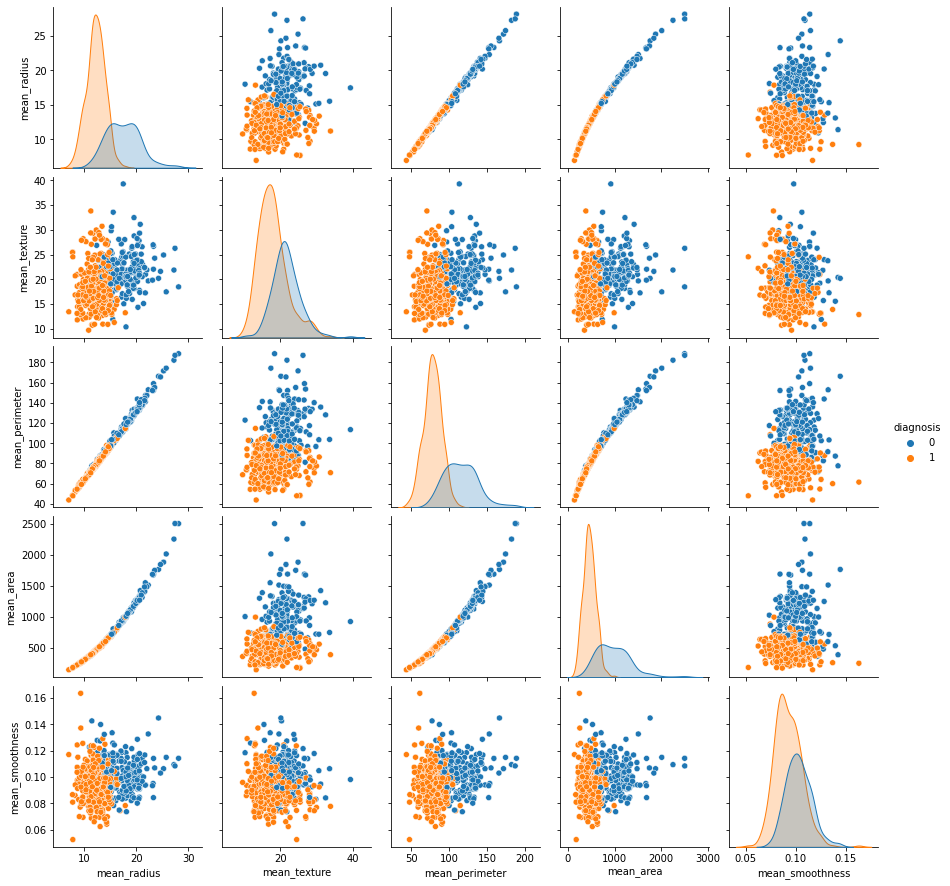

In [389]:
sns.pairplot(df, hue = 'diagnosis' )

Removing Outliers

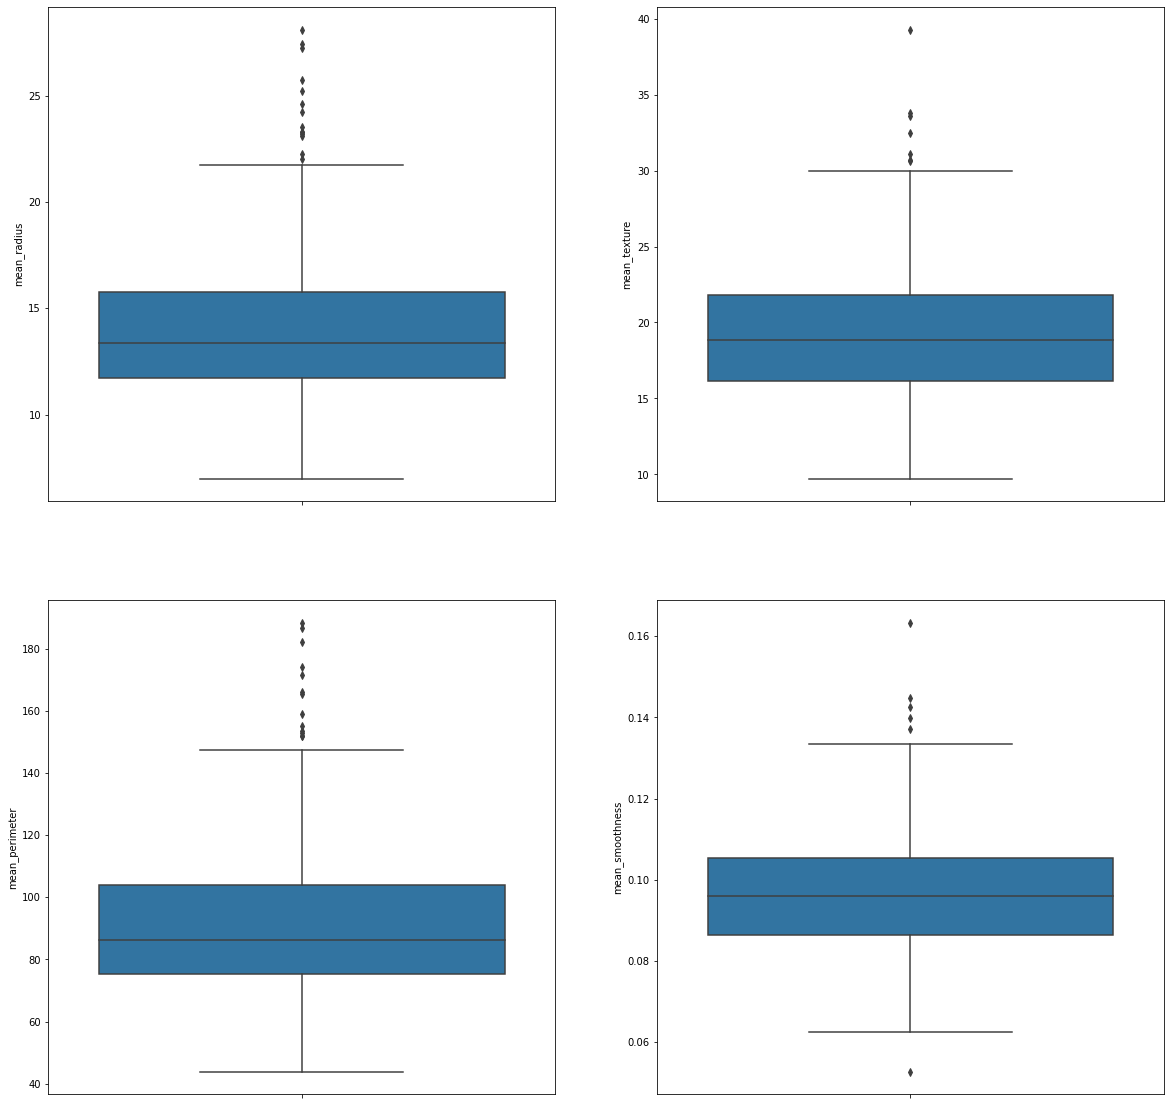

In [390]:
figure, axes = plt.subplots(2,2,figsize = (20,20))
sns.boxplot(ax = axes[0,0],y = 'mean_radius',hue='diagnosis', data = df)
sns.boxplot(ax = axes[0,1],y = 'mean_texture',hue='diagnosis', data = df)
sns.boxplot(ax = axes[1,0],y = 'mean_perimeter',hue='diagnosis', data = df)
sns.boxplot(ax = axes[1,1],y = 'mean_smoothness',hue='diagnosis', data = df)

In [391]:
df[df['mean_radius'] > 20]['diagnosis'].unique()

array([0])

In [392]:
df[df['mean_perimeter'] > 148]['diagnosis'].unique()

array([0])

In [393]:
rows2Delete = np.where(df['mean_smoothness'] > 0.13)

In [394]:
for i in rows2Delete:
    df.drop(i,inplace=True)
df.reset_index(drop=True,inplace = True)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      561 non-null    float64
 1   mean_texture     561 non-null    float64
 2   mean_perimeter   561 non-null    float64
 3   mean_area        561 non-null    float64
 4   mean_smoothness  561 non-null    float64
 5   diagnosis        561 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.4 KB


In [396]:
df[df['mean_texture'] > 30]['diagnosis'].unique()

array([0, 1])

In [397]:
rows2Delete = np.where(df['mean_texture'] > 30)

In [398]:
rows2Delete

(array([214, 227, 234, 253, 259, 449, 554]),)

In [399]:
for i in rows2Delete:
    df.drop(i,inplace=True)
df.reset_index(drop=True,inplace = True)

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      554 non-null    float64
 1   mean_texture     554 non-null    float64
 2   mean_perimeter   554 non-null    float64
 3   mean_area        554 non-null    float64
 4   mean_smoothness  554 non-null    float64
 5   diagnosis        554 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.1 KB


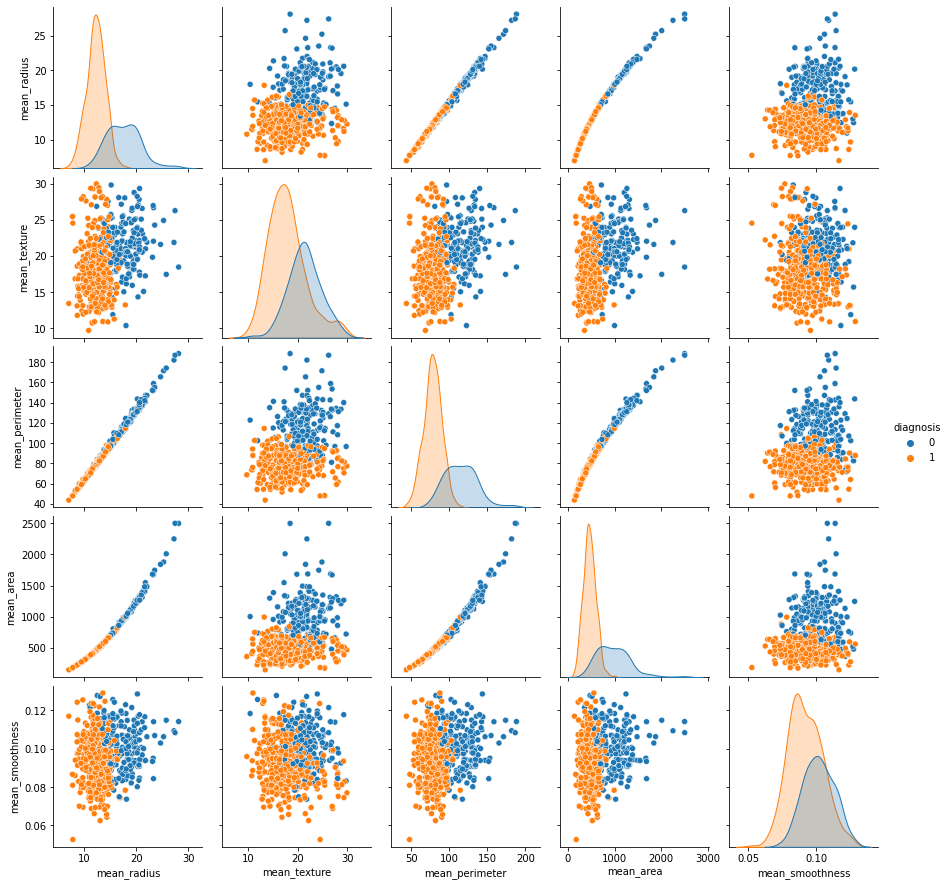

In [401]:
sns.pairplot(df, hue = 'diagnosis' )

Decision Tree Classifier from Scratch

In [402]:
class decisionTreeClassifier:
    def __init__(self, max_depth, minSamples):
        self.maxDepth = max_depth
        self.minSamples = minSamples
        self.treeNode = {}
        self.classes = 2
        
    def entropy(self, l):
        dic = {}
        for i in l:
            if i not in dic:
                dic[i] = 1
            else:
                dic[i] += 1
        sum = 0
        for i in dic:
            p = dic[i] / len(l)
            sum -= p*math.log2(p)
        return sum

    def information_gain(self, entropy1, x1, y1, threshold=1):
        split1 = y1[x1 >= threshold].copy()
        split2 = y1[x1 < threshold].copy()
        entr1 = self.entropy(split1)
        entr2 = self.entropy(split2)
        n1 = len(split1)
        n2 = len(split2)
        n = len(y1)
        info_gain = entropy1 - (n1/n)*entr1 - (n2/n)*entr2
        return info_gain

    def best_split(self, x1, y1, index):
        sorted_array = np.sort(x1)
        avg = np.array([sorted_array[i]+sorted_array[i+1] for i in range(len(y1)-1)])
        avg = avg/2
        thresh_best = 0
        inf = -100
        for t in avg:
            temp = self.information_gain(self.entropy(y1), x1, y1, t)
            if temp > inf:
                thresh_best = t
                inf = temp
#         print("Index number:", index)
#         print("Threshold ==>", thresh_best, "----", "Information Gain==>", inf)
        return inf,thresh_best

    def maximumFreq(self,array):
        dictionary = {}
        for i in array:
            if i not in dictionary:
                dictionary[i] = 1
            else:
                dictionary[i]+=1
        count = -1
        ans = -1
        for j in dictionary:
            if dictionary[j] > count:
                count = dictionary[j]
                ans = j
        return ans
    
    def fit(self, x, y,index=0,length=0):
        if index == 0:
            self.treeNode = {}
        if len(y) <= self.minSamples:
            self.treeNode[index] = 'C:'+str(self.maximumFreq(y))
            return
        if length >= self.maxDepth:
            self.treeNode[index] = 'C:'+str(self.maximumFreq(y))
            return
        inf = -100
        split = -1
        valsplit  = float("inf")
        for i in range(x.shape[1]):
            temp , thresh = self.best_split(x[:,i], y , i)
            if temp > inf:
                inf = temp
                split = i
                valsplit = thresh
        if split == -1:
            self.treeNode[index] = 'C:'+str(self.maximumFreq(y))
            return
        self.treeNode[index] = [split, valsplit]
        length+=1
        x_ = x.copy()
        y_ = y.copy()
        x_left = x_[x_[:, split] < valsplit]
        x_right = x_[x_[:, split] >= valsplit]
        y_left = y_[x_[:, split] < valsplit]
        y_right = y_[x_[:, split] >= valsplit]
        lengthcopy = length
        self.fit(x_left, y_left,2*index+1,lengthcopy)
        self.fit(x_right, y_right,2*index+2,lengthcopy)

    def predict_one(self, x):
      i = 0
      while type(self.treeNode[i]) != str:
        if x[self.treeNode[i][0]] < self.treeNode[i][1] :
          i = 2*i + 1
        elif x[self.treeNode[i][0]] >= self.treeNode[i][1] :
          i = 2*i + 2
      return float(self.treeNode[i].split(":")[1])
        
    def predict(self, x_):
      y__ = []
      for row in x_:
        y__.append(self.predict_one(row))
      return np.array(y__)
        

In [403]:
tree = decisionTreeClassifier(12,3)

In [404]:
X = np.array(df.iloc[:,0:5])
y = np.array(df['diagnosis'])

In [405]:
from sklearn.metrics import accuracy_score

In [406]:
X_train, X_test, y_train, y_test = tts(X , y , test_size=0.2, random_state=12)
tree.fit(X_train, y_train)
ypred = tree.predict(X_test)

In [407]:
accuracy_score(y_test, ypred)

0.9009009009009009

In [408]:
ypredfull = tree.predict(X)

In [409]:
accuracy_score(y,ypredfull)

0.9729241877256317

In [410]:
def kFoldAccuracy(x,y,model,k=5):
    xlist = []
    ylist = []
    part = int(len(x)/k)
    for i in range(k):
        tempx = [x[j] for j in range(part*i ,part*i + part)]
        tempy = [y[j] for j in range(part*i, part*i + part)]
        xlist.append(tempx)
        ylist.append(tempy)
    res = []
    for i in range(k):
        xtrain = []
        ytrain = []
        xtest = []
        ytest = []
        for j in range(k):
            if i!=j:
                xtrain.extend(xlist[j])
                ytrain.extend(ylist[j])
            else:
                xtest.extend(xlist[j])
                ytest.extend(ylist[j])
        model.fit(np.array(xtrain),np.array(ytrain))
        ypred = model.predict(np.array(xtest))
        res.append(accuracy_score(ypred,np.array(ytest)))
    return res , np.mean(np.array(res))

In [411]:
maxDepths = [6,7,8,9,10,11,12]
depths = []
accuracies = []
for depth in maxDepths:
    tree = decisionTreeClassifier(depth,3)
    accuracies.extend(kFoldAccuracy(X_train, y_train, tree)[0])
    depths.extend([depth,]*5)

In [412]:
df_ = pd.DataFrame()
df_['depth'] = depths
df_['accuracy'] = accuracies

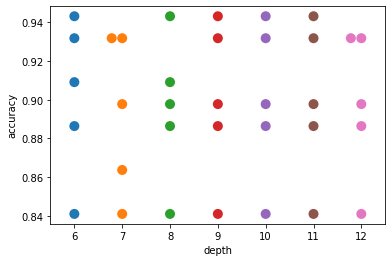

In [413]:
sns.swarmplot(x = 'depth', y = 'accuracy', data = df_, size = 10)

In [414]:
maxDepths = [5,6,7,8,9,10,11,12]
accuracies = []
for depth in maxDepths:
    tree = decisionTreeClassifier(depth,3)
    accuracies.append(kFoldAccuracy(X_train, y_train, tree)[1])

In [415]:
df_ = pd.DataFrame()
df_['depth'] = maxDepths
df_['accuracy'] = accuracies

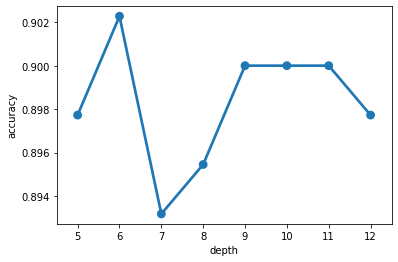

In [416]:
sns.pointplot(x = 'depth', y = 'accuracy', data = df_)

In [417]:
# !pip install xgboost

In [418]:
from xgboost import XGBClassifier
xg = XGBClassifier(max_depth = 4, subsample = 0.7)

In [419]:
xg.fit(X_train, y_train)

XGBClassifier(max_depth=4, subsample=0.7)

In [420]:
ypred = xg.predict(X_test)

In [421]:
ypredtrain = xg.predict(X_train)

In [422]:
from sklearn.metrics import confusion_matrix as cm

In [423]:
cm(y_test, ypred)

array([[41,  2],
       [ 5, 63]])

In [424]:
accuracy_score(y_test, ypred)

0.9369369369369369

In [425]:
accuracy_score(y_train, ypredtrain)

0.9887133182844243

In [426]:
# !pip install lightgbm

In [427]:
from lightgbm import LGBMClassifier as lbgmc
numleaves = [2,3,4,5,6,7,8,9,10,11]
dic = []
for i in numleaves:
    lbc = lbgmc( max_depth = 3, num_leaves = i)
    lbc.fit(X_train, y_train)
    ypred = lbc.predict(X_test)
    dic.append(accuracy_score(y_test, ypred))

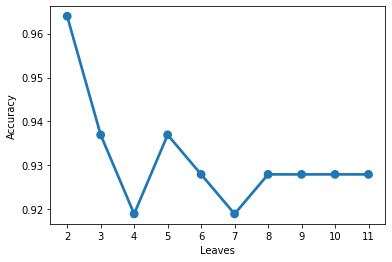

In [428]:
df_  = pd.DataFrame()
df_['Accuracy'] = dic
df_['Leaves'] = numleaves
sns.pointplot(x = 'Leaves', y = 'Accuracy', data = df_) 

In [429]:
trainingAccuracies = []
testingAccuracies = []
numleaves = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in numleaves:
  lbc_ = lbgmc(max_depth = 2, num_leaves = i)
  lbc_.fit(X_train, y_train)
  testingAccuracies.append(accuracy_score(y_test, lbc_.predict(X_test)))
  trainingAccuracies.append(accuracy_score(y_train, lbc_.predict(X_train))) 

In [430]:
df_ = pd.DataFrame()
df_['Accuracy'] = trainingAccuracies
df_['TestingAccuracy'] = testingAccuracies
df_['Leaves'] = numleaves

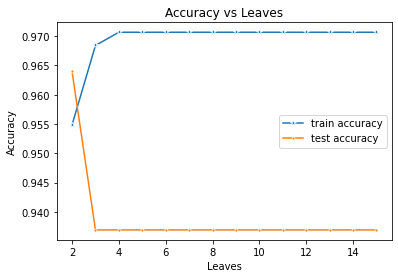

In [431]:
sns.lineplot(data = df_, x = "Leaves", y = "Accuracy", palette = "bwr", marker = "*", label = "train accuracy")
sns.lineplot(data = df_, x = "Leaves", y = "TestingAccuracy", palette = "bwr", marker = ".", label = "test accuracy")
plt.legend()
plt.title("Accuracy vs Leaves")
plt.show()

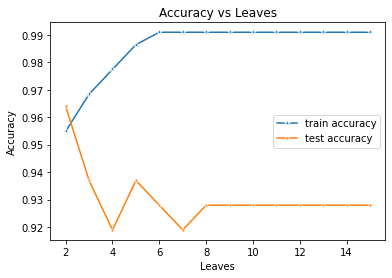

In [432]:
trainingAccuracies = []
testingAccuracies = []
numleaves = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in numleaves:
  lbc_ = lbgmc(max_depth = 3, num_leaves = i)
  lbc_.fit(X_train, y_train)
  testingAccuracies.append(accuracy_score(y_test, lbc_.predict(X_test)))
  trainingAccuracies.append(accuracy_score(y_train, lbc_.predict(X_train))) 
df_ = pd.DataFrame()
df_['Accuracy'] = trainingAccuracies
df_['TestingAccuracy'] = testingAccuracies
df_['Leaves'] = numleaves
sns.lineplot(data = df_, x = "Leaves", y = "Accuracy", palette = "bwr", marker = "*", label = "train accuracy")
sns.lineplot(data = df_, x = "Leaves", y = "TestingAccuracy", palette = "bwr", marker = ".", label = "test accuracy")
plt.legend()
plt.title("Accuracy vs Leaves")
plt.show()

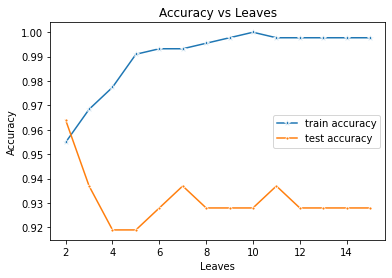

In [433]:
trainingAccuracies = []
testingAccuracies = []
numleaves = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in numleaves:
  lbc_ = lbgmc(max_depth = 4, num_leaves = i)
  lbc_.fit(X_train, y_train)
  testingAccuracies.append(accuracy_score(y_test, lbc_.predict(X_test)))
  trainingAccuracies.append(accuracy_score(y_train, lbc_.predict(X_train))) 
df_ = pd.DataFrame()
df_['Accuracy'] = trainingAccuracies
df_['TestingAccuracy'] = testingAccuracies
df_['Leaves'] = numleaves
sns.lineplot(data = df_, x = "Leaves", y = "Accuracy", palette = "bwr", marker = "*", label = "train accuracy")
sns.lineplot(data = df_, x = "Leaves", y = "TestingAccuracy", palette = "bwr", marker = ".", label = "test accuracy")
plt.legend()
plt.title("Accuracy vs Leaves")
plt.show()

In [434]:
learning_rate = [0.02, 0.04, 0.06, 0.08, 0.10]
num_leaves =  [32, 48, 64, 80, 128]
max_depth = [5,6,7,8,9,10]
subsamples = [0.5,0.6,0.7,0.8,0.9,1.0]
rates = []
leaves = []
depths = []
accuracies = []
samples = []
dic = {}
for rate in learning_rate:
  for leaf in num_leaves:
    for depth in max_depth:
     for sample in subsamples: 
      lbc = lbgmc( max_depth = depth, num_leaves = leaf, learning_rate = rate, subsample=sample)
      lbc.fit(X_train,y_train)
      accuracies.append(accuracy_score(y_test, lbc.predict(X_test)))
      depths.append(depth)
      leaves.append(leaf)
      rates.append(rate)
      samples.append(sample)
      dic[accuracy_score(y_test, lbc.predict(X_test))] = [rate,leaf,depth,sample]

In [435]:
df_ = pd.DataFrame()
df_['Accuracy'] = accuracies
df_['MaxDepth'] = depths
df_['Leaves'] = leaves
df_['LearningRates'] = rates
df_['Subsamples'] = samples

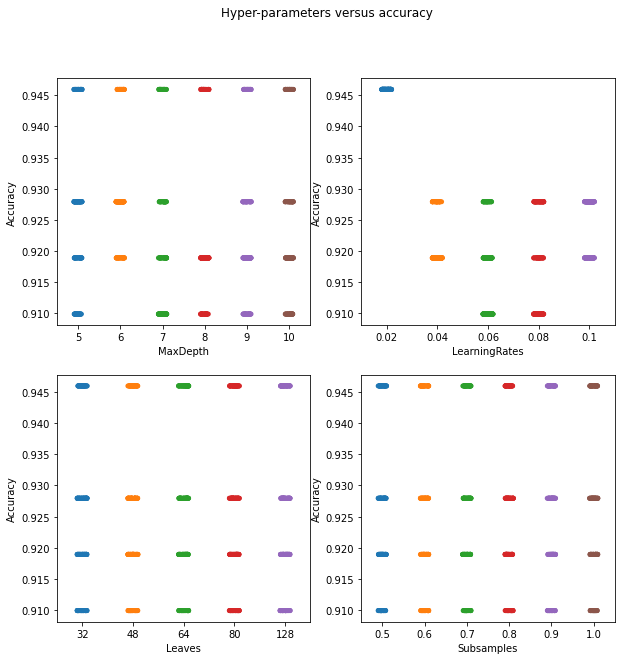

In [436]:
figure, axes = plt.subplots(2, 2, figsize = (10, 10))
figure.suptitle("Hyper-parameters versus accuracy")
sns.stripplot(ax = axes[0, 0], data = df_, x = "MaxDepth", y = "Accuracy")
sns.stripplot(ax = axes[0, 1], data = df_, x = "LearningRates", y = "Accuracy")
sns.stripplot(ax = axes[1, 0], data = df_, x = "Leaves", y = "Accuracy")
sns.stripplot(ax = axes[1, 1], data = df_, x = "Subsamples", y = "Accuracy")

In [437]:
BestParameters = dic[max(dic)]

In [438]:
BestParameters

[0.02, 128, 10, 1.0]